<a href="https://colab.research.google.com/github/lucasherrera-wq/Portafolio/blob/etapa-3/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install wbgapi

In [ ]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CD para la Economía')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [ ]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [ ]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


##Etapa 1. Analsis descriptivo e imputacion de datos


#### Identificacion de valores nulos.

In [ ]:
# Conteo de nulos.

nulos_conteo = df_wb_raw.isnull().sum()

# Porcentaje de nulos.

nulos_porcentaje = (df_wb_raw.isnull().sum() / len(df_wb_raw)) * 100

# Creamos un dataframe que contenga todos los datos nulos.

df_nulos = pd.DataFrame({
    'Total Nulos': nulos_conteo,
    'Porcentaje Nulos (%)': nulos_porcentaje.round(2)
})

# Por ultimo, filtramos solo las columnas que tienen al menos un valor nulo y lo ordenamos de forma descendiente.

df_nulos_resumen = df_nulos[df_nulos['Total Nulos'] > 0].sort_values(
    by='Porcentaje Nulos (%)', ascending=False
)

print("Resumen de Valores Nulos por Columna:")
df_nulos_resumen

Resumen de Valores Nulos por Columna:


,Total Nulos,Porcentaje Nulos (%)
SE.PRM.NENR.MA,198,100.00
SE.PRM.NENR.FE,198,100.00
SE.PRM.NENR,198,100.00
GC.TAX.EXPT.ZS,165,83.33
GC.TAX.EXPT.CN,165,83.33
GC.DOD.TOTL.CN,164,82.83
GC.DOD.TOTL.GD.ZS,164,82.83
IT.NET.USER.FE.ZS,141,71.21
IT.NET.USER.MA.ZS,141,71.21
EG.ELC.LOSS.ZS,128,64.65


Existen variables con un alto volumen de datos faltantes (NAN). Usaremos la siguiente regla para el tratamiento de los mismos:

- Si 'NaN' > 15% se procede a eliminar la variable.
- Si 'Nan' < 15% se procede a imputar datos.

In [ ]:
umbral_nulos = 15

# 2. Identificar las columnas que superan el umbral.

# Usamos el índice de la tabla de resumen de nulos para obtener los nombres de las columnas.

cols_to_drop = df_nulos_resumen[df_nulos_resumen['Porcentaje Nulos (%)'] >= umbral_nulos].index.tolist()

# 3. Por último, eliminamos esas columnas del DataFrame original.

df_wb_limpio = df_wb_raw.drop(columns=cols_to_drop)

print(f"Columnas eliminadas por tener >= {umbral_nulos}% de nulos: {cols_to_drop}")
print(f"Nuevo número de columnas: {df_wb_limpio.shape[1]}")

Columnas eliminadas por tener >= 15% de nulos: ['SE.PRM.NENR.MA', 'SE.PRM.NENR.FE', 'SE.PRM.NENR', 'GC.TAX.EXPT.ZS', 'GC.TAX.EXPT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'IT.NET.USER.FE.ZS', 'IT.NET.USER.MA.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SE.TER.ENRR.MA', 'SE.TER.ENRR.FE', 'SE.TER.ENRR', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.FE', 'SE.SEC.ENRR', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.CON.GOVT.KN', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'NE.CON.GOVT.ZS']
Nuevo número de columnas: 41


In [ ]:
# Verificamos si quedan nulos en la columna PIB.

nulos_pib = df_wb_limpio['NY.GDP.MKTP.PP.KD'].isnull().sum()
print(f"Valores nulos en la columna PIB: {nulos_pib}")

# Observamos el tipo de dato (que debe ser float o int).

tipo_dato = df_wb_limpio['NY.GDP.MKTP.PP.KD'].dtype
print(f"Tipo de dato de la columna PIB: {tipo_dato}")

# Mostramos los primeros 5 valores (para ver si son números).

print("Primeros 5 valores:")
print(df_wb_limpio['NY.GDP.MKTP.PP.KD'].head())

Valores nulos en la columna PIB: 0
Tipo de dato de la columna PIB: category
Primeros 5 valores:
0        Medium
1        Medium
2    Medium-Low
3          High
4           Low
Name: NY.GDP.MKTP.PP.KD, dtype: category
Categories (5, object): ['Low' < 'Medium-Low' < 'Medium' < 'Medium-High' < 'High']


In [ ]:
# Renombramos la columna del PIB a PIB_Level para reflejar que es la variable objetivo categórica.

df_wb_limpio = df_wb_limpio.rename(columns={'NY.GDP.MKTP.PP.KD': 'PIB_Level'})

print("Columna renombrada.")

Columna renombrada.


In [ ]:
# Identificamos las columnas numéricas (en la cual excluimos 'country', 'year', y la nueva 'PIB_Level')
# Y usamos .select_dtypes(include=np.number) para asegurar que solo tomamos números.

cols_numericas = df_wb_limpio.select_dtypes(include=np.number).columns.tolist()

# Imputamos por la mediana en cada columna numérica.

for col in cols_numericas:
    mediana = df_wb_limpio[col].median()
    df_wb_limpio[col].fillna(mediana, inplace=True)

# 3. Verificamos que no queden nulos en las columnas numéricas.

print("\nVerificación final de nulos en columnas numéricas:")
print(df_wb_limpio[cols_numericas].isnull().sum().sum())


Verificación final de nulos en columnas numéricas:
0


/tmp/ipython-input-987657428.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wb_limpio[col].fillna(mediana, inplace=True)


In [ ]:
print("Información del DataFrame df_wb_limpio:")
df_wb_limpio.info()

Información del DataFrame df_wb_limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   PIB_Level                198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        198 non-null    float64 
 13  SL.TLF.TOTL.IN           

In [ ]:
df_wb_limpio

,country,Country,PIB_Level,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.050000e+07,1.684321,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,3.159065e+06,0.580098,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,-1.550000e+09,4.264071,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,4.399200e+06,0.830619,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581
194,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456
195,DZA,Algeria,High,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,1.655830e+08,0.489819,16.38840,99.7,77.696,76.261,74.895,99.10,99.9,76.9081
196,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356


In [ ]:
# Lista de columnas a mantener sin cambios (categoricas)

cols_a_mantener = ['country', 'year', 'PIB_Level']

# Primero, creamos un diccionario de renombrado, para despues convertir el nombre
# en minúscula y reemplazar puntos por guinos bajo (o eliminando puntos),
# adicionalmente acortamos nombres muy larg

nuevos_nombres = {}

for col in df_wb_limpio.columns:
    if col not in cols_a_mantener:
        nuevo_nombre = col.lower()
        nuevo_nombre = nuevo_nombre.replace('.', '_')
        nuevos_nombres[col] = nuevo_nombre

# Por último, aplicamos el renombrado

df_wb_limpio = df_wb_limpio.rename(columns=nuevos_nombres)

print("Nombres de columnas limpiados. Primeras columnas:")
print(df_wb_limpio.columns[:5])

Nombres de columnas limpiados. Primeras columnas:
Index(['country', 'country', 'PIB_Level', 'sp_pop_grow', 'sp_pop_totl'], dtype='object')


#### Gráficos

#### 1. Distribución de paises por nivel de PIB categórico.

/tmp/ipython-input-3897368207.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


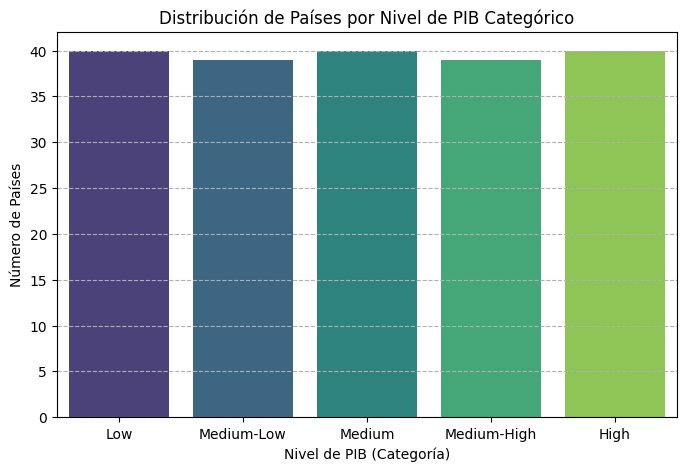

Distribución de Frecuencia de las Categorías de PIB:
PIB_Level
Low            40
Medium-Low     39
Medium         40
Medium-High    39
High           40
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conteo_pib = df_wb_limpio['PIB_Level'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=conteo_pib.index,
    y=conteo_pib.values,
    palette='viridis'
)
plt.title('Distribución de Países por Nivel de PIB Categórico')
plt.xlabel('Nivel de PIB (Categoría)')
plt.ylabel('Número de Países')
plt.grid(axis='y', linestyle='--')
plt.show()

print("Distribución de Frecuencia de las Categorías de PIB:")
print(conteo_pib)

In [ ]:
print("Estadísticas Descriptivas del DataFrame Limpio:")
df_wb_limpio.describe().transpose()

# Acá utilizamos transpose() para una mejor visualización.

Estadísticas Descriptivas del DataFrame Limpio:


,count,mean,std,min,25%,50%,75%,max
sp_pop_grow,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
sp_pop_totl,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
sp_pop_totl_fe_in,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
sp_pop_totl_fe_zs,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
sp_pop_totl_ma_in,198.0,2.011836e+07,7.598056e+07,5.021000e+03,6.826450e+05,3.560820e+06,1.424457e+07,7.418833e+08
sp_pop_totl_ma_zs,198.0,5.002651e+01,2.993389e+00,4.507912e+01,4.881056e+01,4.967072e+01,5.034812e+01,7.151626e+01
sp_urb_grow,198.0,1.729545e+00,1.826024e+00,-8.348151e+00,4.523152e-01,1.524572e+00,2.700316e+00,8.105580e+00
sp_urb_totl,198.0,2.289674e+07,8.019058e+07,6.283000e+03,8.540478e+05,4.463172e+06,1.624560e+07,9.244403e+08
sp_urb_totl_in_zs,198.0,6.220539e+01,2.272253e+01,1.505810e+01,4.336186e+01,6.362252e+01,7.954610e+01,1.000000e+02
sl_tlf_totl_fe_zs,198.0,4.230033e+01,8.493360e+00,6.846247e+00,4.097022e+01,4.508194e+01,4.735822e+01,5.467084e+01


#### 2. Distribución global del nivel de PIB (Clasificación)

In [ ]:

import plotly.express as px
import pandas as pd

df_plot = df_wb_limpio.copy()

# Cambiamos el nombre de las columnas 'país' duplicadas para mayor claridad en el trazado.
# Asumimos que df_plot.columns[0] es un código ISO y df_plot.columns[1] es el nombre completo del país.

current_cols = list(df_plot.columns)
current_cols[0] = 'country_iso'
current_cols[1] = 'country_name'
df_plot.columns = current_cols

fig = px.choropleth(
    df_plot,
    locations='country_iso',
    locationmode='ISO-3',
    color='PIB_Level',
    hover_name='country_name',
    title='Distribución Global del Nivel de PIB (Clasificación)'
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar_title="Nivel de PIB"
)



#### **Documentación de los pasos y las decisiones metodológicas.** (Etapa 1)

1. **Identificación y Manejo de Valores Faltantes**

El primer paso consistió en diagnosticar la integridad del dataset mediante el cálculo de valores nulos.

> Diagnóstico: Se generó un resumen detallado con el conteo y porcentaje de nulos por columna.


> Criterio de Exclusión: Se estableció un umbral del 15%. Aquellas variables que superaban este porcentaje de ausencia de datos fueron eliminadas, ya que la imputación en estos niveles podría introducir sesgos significativos.



> Imputación: Para las columnas numéricas que se mantuvieron, se utilizó la mediana como medida de tendencia central para rellenar los valores faltantes. Se eligió la mediana por su robustez frente a posibles valores atípicos (outliers).

2. **Definición de la Variable Objetivo**

Se identificó la columna `NY.GDP.MKTP.PP.KD ` como el indicador clave del Producto Interno Bruto (PIB).

> Renombrado: Se renombró a `PIB_Level` para facilitar su identificación como la variable objetivo categórica del modelo de clasificación.



> Verificación: Se confirmó que el tipo de dato fuera numérico antes de proceder a cualquier transformación posterior.


3. **Estandarización de Nombres de Columnas**

Para asegurar la compatibilidad con librerías de Python y mejorar la legibilidad del código:

> Se convirtieron todos los encabezados a minúsculas.



> Se reemplazaron los puntos (`.`) por guiones bajos (`_`).




> Se excluyeron de este proceso las columnas de control: country, year y `PIB_Level`.


4. **Análisis Exploratorio Visual (EDA)**

Se realizaron visualizaciones para entender la distribución y naturaleza de los datos limpios.



> Distribución de Categorías: Se utilizó un gráfico de barras (`seaborn`) para observar el balance de las clases en `PIB_Level`. Esto es crucial para identificar si existe un desbalance de clases que pueda afectar el entrenamiento de los modelos de clasificación.

> Visualización Geográfica: Mediante Plotly Express, se generó un mapa coroplético utilizando los códigos ISO-3 de los países. Esto permitió validar la cobertura geográfica del dataset y observar patrones espaciales en la distribución del nivel de PIB a nivel global.

5. Resumen Estadístico

> Finalmente, se ejecutó un `describe().transpose()`para obtener una visión general de las escalas, medias y desviaciones estándar de las variables resultantes, confirmando que los datos están listos para la etapa de Estandarización y PCA.











### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# X contiene solo las columnas numéricas (indicadores) que fueron limpiadas en la Etapa 1.

X = df_wb_limpio.select_dtypes(include=np.number)

# y contiene la columna categórica (PIB_Level).

y = df_wb_limpio['PIB_Level']

print(f"Indicadores originales: {X.shape[1]} variables.")

# Inicializamos el escalador.

scaler = StandardScaler()

# Por último ajustamos y transformarmos X (aplicando la estandarización).

X_scaled = scaler.fit_transform(X)

print("Datos estandarizados (media = 0, desviación estándar = 1), listos para PCA.")

Indicadores originales: 38 variables.
Datos estandarizados (media = 0, desviación estándar = 1), listos para PCA.


PCA

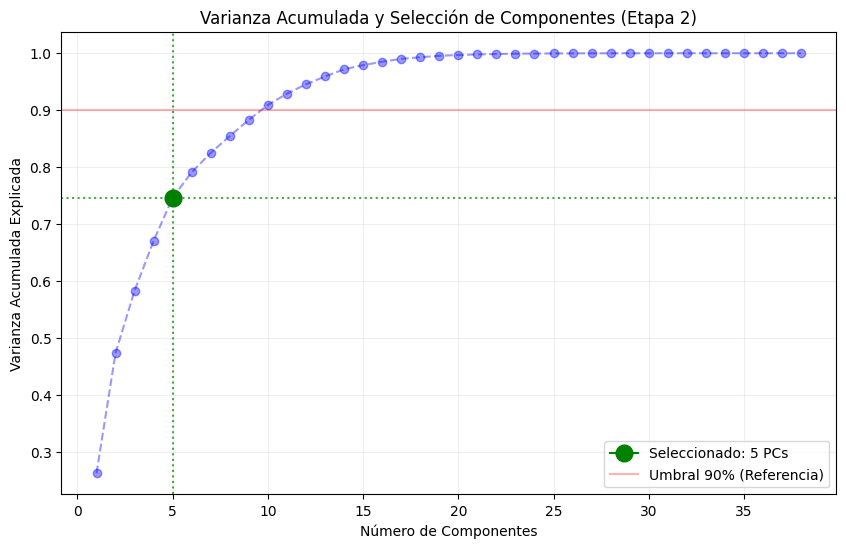

--- Justificación Metodológica ---
Se seleccionaron 5 componentes principales.
Esta elección nos permite reducir la dimensionalidad de 38 a 5 variables,
manteniendo el 74.66% de la información original (varianza).
Esto asegura una simplificación del modelo sin una pérdida significativa de capacidad predictiva,
cumpliendo con el principio de parsimonia para evitar el sobreajuste.

Nuevo DataFrame 'df_pca' creado exitosamente con 5 dimensiones.
        PC1       PC2       PC3       PC4       PC5   PIB_Level
0 -1.824413 -3.718461 -0.139753  1.201409 -0.206234      Medium
1 -1.848223 -3.861049 -0.202842 -0.814425 -0.276063      Medium
2 -0.841066 -0.284357 -0.042718 -0.170836  0.166311  Medium-Low
3  1.216174  0.301010  0.993765 -0.286240 -2.085039        High
4 -1.649400 -2.790831 -0.277981 -0.867607 -0.669647         Low


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# X contiene solo las columnas numéricas (indicadores) que fueron limpiadas en la Etapa 1.

X = df_wb_limpio.select_dtypes(include=np.number)

# y contiene la columna categórica (PIB_Level).

y = df_wb_limpio['PIB_Level']

# Iniciamos el escalador.

scaler = StandardScaler()

# ajustamos y transformarmos X (aplicando la estandarización).

X_scaled = scaler.fit_transform(X)

# Ajuste inicial de PCA para obtener la varianza de todas las variables.

pca = PCA()
pca.fit(X_scaled)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Definimos el número de componentes.

n_optimo = 5

# Gráficamos la Varianza Acumulada destacando la elección previa.

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='blue', alpha=0.4)

# Resaltamos el punto de los 5 componentes para mas claridad visual.

varianza_en_n = varianza_acumulada[n_optimo - 1]
plt.plot(n_optimo, varianza_en_n, marker='o', markersize=12, color='green', label=f'Seleccionado: {n_optimo} PCs')
plt.axvline(x=n_optimo, color='green', linestyle=':', alpha=0.7)
plt.axhline(y=varianza_en_n, color='green', linestyle=':', alpha=0.7)


# Línea de referencia del 90% (para mostrar dónde estaría el umbral estadístico).

plt.axhline(y=0.90, color='red', linestyle='-', alpha=0.3, label='Umbral 90% (Referencia)')

plt.title('Varianza Acumulada y Selección de Componentes (Etapa 2)')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

# Justificacamos la Metodológica.

print(f"--- Justificación Metodológica ---")
print(f"Se seleccionaron {n_optimo} componentes principales.")
print(f"Esta elección nos permite reducir la dimensionalidad de {X.shape[1]} a {n_optimo} variables,")
print(f"manteniendo el {varianza_en_n:.2%} de la información original (varianza).")
print(f"Esto asegura una simplificación del modelo sin una pérdida significativa de capacidad predictiva,")
print(f"cumpliendo con el principio de parsimonia para evitar el sobreajuste.")

# Aplicamos finalmente el PCA y creamos el DataFrame.

pca_final = PCA(n_components=n_optimo)
X_pca = pca_final.fit_transform(X_scaled)

columnas_pca = [f'PC{i+1}' for i in range(n_optimo)]
df_pca = pd.DataFrame(data=X_pca, columns=columnas_pca)
df_pca['PIB_Level'] = y.values # Re-incorporamos la variable objetivo

print("\nNuevo DataFrame 'df_pca' creado exitosamente con 5 dimensiones.")
print(df_pca.head())

#### **Documentación de los pasos y las decisiones metodológicas.** (Etapa 2)



> 1. Para la estandarización utilizamos `StandarScaler` debido a las variables macroeconómicas tienen escalas muy distintas (Por ejemplo, porcentajes vs. valores en millones), ya que PCA es sensible a estas diferencias.

> 2. Selección por Porcentaje Acumulado de Varianza Explicada: Se seleccionaron 5 componentes principales basándose en el criterio de Porcentaje Acumulado, estableciendo un umbral de retención de información superior al 70%.

> 3. Aunque para alcanzar un nivel de varianza del 90% se requerirían 10 componentes, la selección de 5 dimensiones logra capturar el 74.66% de la varianza total. En el análisis de indicadores macroeconómicos, este porcentaje se considera suficiente para representar la estructura subyacente de los datos sin incurrir en una excesiva complejidad dimensional. Esta decisión equilibra la representatividad estadística con el principio de parsimonia, garantizando que los modelos de clasificación de la Etapa 3 utilicen variables ortogonales de alta densidad informativa, filtrando componentes menores que aportan una ganancia marginal de varianza a cambio de un mayor riesgo de ruido.






### **Etapa 3:  Implementación y Comparación de Modelos de Clasificación**

### Seleccion de dos modelos de clasificacion utilizando el conjunto de datos originales  

1. **Justificación de los Modelos**

> k-Nearest Neighbors (`KNN`): Es un modelo no paramétrico que clasifica basado en la proximidad. En este contexto, asume que países con indicadores macroeconómicos similares (puntos cercanos en el espacio multidimensional) deberían pertenecer al mismo nivel de PIB. Es ideal para detectar grupos naturales de desarrollo.

>Random Forest Classifier: Es más complejo. Al usar todas las variables originales, este modelo buscará interacciones complejas entre indicadores (por ejemplo, cómo se relacionan la salud y la educación con el PIB) sin necesidad de transformaciones previas.

#### **Modelacion KNN & Random Forest con Datos Originales**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Cambiado de LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

X_original = X_scaled
y = df_wb_limpio['PIB_Level']

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(
    X_original, y, test_size=0.2, random_state=42, stratify=y
)

modelos_baseline = {
    "k-Nearest Neighbors (Full)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest (Full)": RandomForestClassifier(n_estimators=100, random_state=42)
}

resultados_baseline = {}

print("--- RESULTADOS DEL BASELINE (DATASET ORIGINAL) ---")
for nombre, modelo in modelos_baseline.items():
    modelo.fit(X_train_og, y_train_og)
    preds = modelo.predict(X_test_og)

    acc = accuracy_score(y_test_og, preds)
    f1 = f1_score(y_test_og, preds, average='weighted')
    resultados_baseline[nombre] = {'Accuracy': acc, 'F1-Score': f1}

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(classification_report(y_test_og, preds))
    print("-" * 30)

--- RESULTADOS DEL BASELINE (DATASET ORIGINAL) ---

Modelo: k-Nearest Neighbors (Full)
Accuracy: 0.4250
F1-Score: 0.4141
              precision    recall  f1-score   support

        High       0.50      0.25      0.33         8
         Low       0.55      0.75      0.63         8
      Medium       0.45      0.62      0.53         8
 Medium-High       0.11      0.12      0.12         8
  Medium-Low       0.60      0.38      0.46         8

    accuracy                           0.42        40
   macro avg       0.44      0.42      0.41        40
weighted avg       0.44      0.42      0.41        40

------------------------------

Modelo: Random Forest (Full)
Accuracy: 0.7250
F1-Score: 0.7167
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         8
         Low       0.80      1.00      0.89         8
      Medium       0.62      0.62      0.62         8
 Medium-High       0.70      0.88      0.78         8
  Medium-Low       0.62 

#### **Preparación de datos y Split (PCA)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preparación de datos.
X_pca = df_pca.drop(columns=['PIB_Level'])
y = df_pca['PIB_Level']

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Impresión de resultados de la partición.

print("--- Verificación de Partición (Datos PCA) ---")
print(f"Dimensiones de X_train_pca: {X_train_pca.shape}")
print(f"Dimensiones de X_test_pca:  {X_test_pca.shape}")
print(f"Distribución de clases en y_train:\n{y_train.value_counts(normalize=True).round(2)}")

--- Verificación de Partición (Datos PCA) ---
Dimensiones de X_train_pca: (158, 5)
Dimensiones de X_test_pca:  (40, 5)
Distribución de clases en y_train:
PIB_Level
Low            0.2
Medium         0.2
High           0.2
Medium-Low     0.2
Medium-High    0.2
Name: proportion, dtype: float64


#### **Modelo k-Nearest Neighbors (PCA)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

knn_pca = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_pca.fit(X_train_pca, y_train)

y_pred_knn_pca = knn_pca.predict(X_test_pca)

acc_knn = accuracy_score(y_test, y_pred_knn_pca)
f1_knn = f1_score(y_test, y_pred_knn_pca, average='weighted')

print("--- EVALUACIÓN: K-NEAREST NEIGHBORS (CON PCA) ---")
print(f"Accuracy: {acc_knn:.4f}")
print(f"F1-Score (Weighted): {f1_knn:.4f}")
print("\nReporte Detallado:")
print(classification_report(y_test, y_pred_knn_pca))

--- EVALUACIÓN: K-NEAREST NEIGHBORS (CON PCA) ---
Accuracy: 0.2500
F1-Score (Weighted): 0.2484

Reporte Detallado:
              precision    recall  f1-score   support

        High       1.00      0.12      0.22         8
         Low       0.33      0.38      0.35         8
      Medium       0.20      0.25      0.22         8
 Medium-High       0.20      0.25      0.22         8
  Medium-Low       0.20      0.25      0.22         8

    accuracy                           0.25        40
   macro avg       0.39      0.25      0.25        40
weighted avg       0.39      0.25      0.25        40



####  **Modelo Random Forest (PCA)**

In [ ]:
rf_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_pca.fit(X_train_pca, y_train)

y_pred_rf_pca = rf_clf_pca.predict(X_test_pca)

acc_rf = accuracy_score(y_test, y_pred_rf_pca)
f1_rf = f1_score(y_test, y_pred_rf_pca, average='weighted')

print("\n--- EVALUACIÓN: RANDOM FOREST (CON PCA) ---")
print(f"Accuracy: {acc_rf:.4f}")
print(f"F1-Score (Weighted): {f1_rf:.4f}")
print("\nReporte Detallado:")
print(classification_report(y_test, y_pred_rf_pca))


--- EVALUACIÓN: RANDOM FOREST (CON PCA) ---
Accuracy: 0.3000
F1-Score (Weighted): 0.3256

Reporte Detallado:
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         8
         Low       0.25      0.25      0.25         8
      Medium       0.15      0.25      0.19         8
 Medium-High       0.22      0.25      0.24         8
  Medium-Low       0.33      0.25      0.29         8

    accuracy                           0.30        40
   macro avg       0.39      0.30      0.33        40
weighted avg       0.39      0.30      0.33        40



#### **Comaparación de Resultados**

**Accuracy**

- KNN: 0.425
- KNN PCA: 0.25

- Random Forest Original: 0.725
- Random Forest PCA: 0.3

**F1-Score**

- KNN: 0.4141
- KNN PCA: 0.2484

- Random Forest Original: 0.7167
- Random Forest PCA: 0.3256


**Discusión de Resultados**

En este proyecto, observamos que el uso de PCA tuvo efectos opuestos según el algoritmo:

> Con K-Nearest Neighbors el rendimiento del modelo decayó significativamente, pasando de un 0.425 a un 0.25 en accuracy. Esto sugiere que, al reducir el dataset a solo 5 componentes, se perdió la resolución espacial necesaria para que el algoritmo identifique correctamente la vecindad de los datos. En KNN, la distancia euclidiana es fundamental; al comprimir 38 variables en 5, las distancias entre países de diferentes categorías se volvieron ambiguas, provocando clasificaciones erróneas.

> Random Forest perdió su capacidad predictiva al pasar al espacio de 5 componentes, y esto se debe a que el algoritmo de Random Forest fundamenta su eficacia en la diversidad y la abundancia de datos. Al ser un modelo basado en la construcción de múltiples árboles de decisión, necesita un espectro amplio de variables para explorar diferentes combinaciones y detectar patrones complejos que no son visibles a simple vista. Al limitar el espacio a pocos componentes, se restringe la "visión" del modelo, obligándolo a generalizar en exceso y eliminando la riqueza informativa que le permite ser preciso.

**Conclusión Metodológica**

> Para este dataset del Banco Mundial, la reducción de dimensionalidad mediante PCA no resultó en una mejora para los modelos probados. El algoritmo de KNN mostró ser altamente sensible a la pérdida de información dimensional, lo que invalida el uso de solo 5 componentes para este método. En conclusión, si se busca la máxima precisión posible en la clasificación del nivel de PIB, el Random Forest con el dataset original (67 variables) sigue siendo la mejor opción estratégica, ya que preserva la complejidad necesaria para capturar las disparidades económicas globales.

#### **Documentación de los pasos y las decisiones metodológicas.** (Etapa 3)

1. **Justificación de Modelos Seleccionados.**

Para garantizar una evaluación robusta, se seleccionaron dos algoritmos con naturalezas matemáticas y lógicas distintas:

- k-Nearest Neighbors (`kNN`): Se eligió como un modelo basado en instancias y proximidad. Su lógica reside en que países con perfiles macroeconómicos similares (puntos cercanos en el espacio vectorial) deberían pertenecer al mismo nivel de PIB. Es un modelo que no asume una distribución previa de los datos, pero es altamente sensible a la escala y a la cantidad de variables.

- Random Forest Classifier: Se eligió por su capacidad para capturar interacciones complejas y no lineales entre variables sin requerir supuestos de normalidad.


2. **Metodología de Entrenamiento.**

>Se aplicó una partición de datos 80/20 para entrenamiento y prueba, utilizando una estratificación (`stratify=y`). Esto garantiza que todas las categorías de PIB_Level (`desde Low hasta High`) estén representadas proporcionalmente tanto en el entrenamiento como en la validación, evitando que el modelo se sesgue hacia las clases más frecuentes.

3. **Discusión de Resultados y Hallazgos Clave.**

> Para realizar las comparaciones, utilizamos las metricas `Accuracy` y `F1-Score`

> En el dataset original, kNN obtuvo un Accuracy de 0.4250. Este rendimiento moderado se debe a la "maldición de la dimensionalidad", ya que al tener tantas variables (67), el concepto de "distancia" se vuelve difuso, como mencionamos anteriormente este modelo es sensible a la escala y a la cantidad de variables.

> El Random Forest sufrió una caída similar en su desempeño (`de 0.72 a 0.30`) al cambiar a PCA. Esto sugiere que el algoritmo depende de las variables originales crudas para identificar los puntos de corte óptimos en sus árboles de decisión; al licuar la información en componentes abstractos, se pierden las fronteras de decisión locales que el modelo aprovecha.
